# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)
#print(api_key)

http://api.openweathermap.org/data/2.5/weather?appid=8c5a07baaf8683991a1e52847dea561d&units=metric&q=


In [5]:
# Get current weather for all the cities 
count_city=0
count_fail=0

     
city_list=list()
cloudiness_list=list()
temp_list = list()
country_code=list()
date_list=list()
humidity_list=list()
lat_list = list()
long_list=list()
max_temp_list=list()
windspeed_list=list()

#creating loop 
for city in cities:
    count_city=count_city+1
    print("Retrieving  data for record " + str(count_city) + " " + city)
    try:
        weather_response = requests.get(query_url + city).json()
        city_list.append (weather_response["name"])
        cloudiness_list.append (weather_response["clouds"]["all"])
        country_code.append (weather_response["sys"]["country"])
        date_list.append (weather_response["dt"])
        humidity_list.append (weather_response["main"]["humidity"])
        lat_list.append (weather_response["coord"]["lat"])
        long_list.append (weather_response["coord"]["lon"])
        max_temp_list.append (weather_response["main"]["temp_max"])
        windspeed_list.append (weather_response["wind"]["speed"])
    except:
        count_fail +=1
        print("City not found.  Skipping" + city)
        print("error code: " + weather_response["cod"])
        print("message: " + weather_response["message"])

pprint(weather_response)        
print("Completed data retreival....")
print("------------------------")
print("Total number of cities not found: " + str(count_fail))

Retrieving  data for record 1 egvekinot
Retrieving  data for record 2 bredasdorp
Retrieving  data for record 3 wanlaweyn
Retrieving  data for record 4 kapaa
Retrieving  data for record 5 tsihombe
City not found.  Skippingtsihombe
error code: 404
message: city not found
Retrieving  data for record 6 mataura
Retrieving  data for record 7 kaitangata
Retrieving  data for record 8 beringovskiy
Retrieving  data for record 9 punta arenas
Retrieving  data for record 10 albanel
Retrieving  data for record 11 iqaluit
Retrieving  data for record 12 la gaulette
City not found.  Skippingla gaulette
error code: 404
message: city not found
Retrieving  data for record 13 taolanaro
City not found.  Skippingtaolanaro
error code: 404
message: city not found
Retrieving  data for record 14 guantanamo
Retrieving  data for record 15 bethel
Retrieving  data for record 16 hobart
Retrieving  data for record 17 inirida
Retrieving  data for record 18 paradwip
City not found.  Skippingparadwip
error code: 404
mess

Retrieving  data for record 163 sembe
City not found.  Skippingsembe
error code: 404
message: city not found
Retrieving  data for record 164 georgetown
Retrieving  data for record 165 ossora
Retrieving  data for record 166 miri
Retrieving  data for record 167 salalah
Retrieving  data for record 168 hoquiam
Retrieving  data for record 169 ambon
Retrieving  data for record 170 les cayes
Retrieving  data for record 171 nizhneyansk
City not found.  Skippingnizhneyansk
error code: 404
message: city not found
Retrieving  data for record 172 paranga
Retrieving  data for record 173 tiksi
Retrieving  data for record 174 djibo
Retrieving  data for record 175 ponta do sol
Retrieving  data for record 176 taoudenni
Retrieving  data for record 177 klaksvik
Retrieving  data for record 178 bambous virieux
Retrieving  data for record 179 mys shmidta
City not found.  Skippingmys shmidta
error code: 404
message: city not found
Retrieving  data for record 180 luderitz
Retrieving  data for record 181 ocos


Retrieving  data for record 324 invermere
Retrieving  data for record 325 kasongo-lunda
Retrieving  data for record 326 sambava
Retrieving  data for record 327 ous
Retrieving  data for record 328 tshane
Retrieving  data for record 329 am timan
Retrieving  data for record 330 evensk
Retrieving  data for record 331 grand gaube
Retrieving  data for record 332 grodzisk wielkopolski
Retrieving  data for record 333 wloclawek
Retrieving  data for record 334 nome
Retrieving  data for record 335 black river
Retrieving  data for record 336 codrington
Retrieving  data for record 337 kulhudhuffushi
Retrieving  data for record 338 hami
Retrieving  data for record 339 yichun
Retrieving  data for record 340 lufilufi
Retrieving  data for record 341 kaduna
Retrieving  data for record 342 eskasem
City not found.  Skippingeskasem
error code: 404
message: city not found
Retrieving  data for record 343 saint-leu
Retrieving  data for record 344 gravdal
Retrieving  data for record 345 pasuruan
Retrieving  da

Retrieving  data for record 497 kahului
Retrieving  data for record 498 tual
Retrieving  data for record 499 jinxiang
Retrieving  data for record 500 saint anthony
Retrieving  data for record 501 llano de piedra
Retrieving  data for record 502 khorixas
Retrieving  data for record 503 touros
Retrieving  data for record 504 lar
Retrieving  data for record 505 matane
Retrieving  data for record 506 vredendal
Retrieving  data for record 507 glenwood springs
Retrieving  data for record 508 callaway
Retrieving  data for record 509 portsmouth
Retrieving  data for record 510 north bend
Retrieving  data for record 511 saint-denis
Retrieving  data for record 512 bathsheba
Retrieving  data for record 513 kapit
Retrieving  data for record 514 sukhumi
City not found.  Skippingsukhumi
error code: 404
message: city not found
Retrieving  data for record 515 prado
Retrieving  data for record 516 draganesti
Retrieving  data for record 517 bullhead city
Retrieving  data for record 518 kollam
Retrieving  

NameError: name 'pprint' is not defined

In [6]:
print("City", len(city_list))
print("cloudiness", len(cloudiness_list))
print("country", len(country_code))
print("date", len(date_list))
print("humidity", len(humidity_list))
print("lat", len(lat_list))
print("long", len(long_list))
print("max temp", len(max_temp_list))
print("wind speed", len(windspeed_list))

City 549
cloudiness 549
country 549
date 549
humidity 549
lat 549
long 549
max temp 549
wind speed 549


In [7]:
weather_count = {"City":city_list,"Cloudiness":cloudiness_list,
             "Country":country_code,"Date":date_list,
             "Humidity":humidity_list,"Lat":lat_list,
             "Long":long_list,"Max Temp":max_temp_list,
             "Wind Speed":windspeed_list}
weather_dataframe = pd.DataFrame(weather_count)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Egvekinot,100,RU,1563634372,95,66.32,-179.17,6.24,1.46
1,Bredasdorp,66,ZA,1563634373,47,-34.53,20.04,14.00,3.60
2,Wanlaweyn,76,SO,1563634373,58,2.62,44.89,27.14,9.78
3,Kapaa,90,US,1563634373,88,22.08,-159.32,26.00,7.20
4,Mataura,100,NZ,1563634373,98,-46.19,168.86,8.33,1.09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
x_axis=weather_dataframe["Lat"]
y_axis_temp=weather_dataframe["Max Temp"]
y_axis_humidity=weather_dataframe["Humidity"]
y_axis_cloudiness=weather_dataframe["Cloudiness"]
y_axis_windspeed=weather_dataframe["Wind Speed"]
max_tempature = weather_dataframe.iloc[max_temp_list]

max_tempature.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
6,Beringovskiy,100,RU,1563634374,79,63.05,179.32,13.84,2.48
14,Indramayu,68,ID,1563634376,95,-4.05,103.78,19.74,1.39
27,Mar del Plata,13,AR,1563634378,47,-46.43,-67.52,5.24,9.67
26,Fortuna,90,US,1563634378,87,40.60,-124.16,13.33,6.93
8,Albanel,75,CA,1563634374,73,48.88,-72.44,25.56,2.60


C:\Users\Christina\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<function matplotlib.pyplot.show(*args, **kw)>

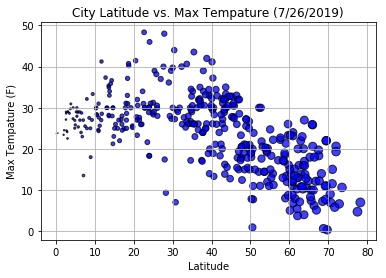

In [9]:
plt.scatter(x_axis, y_axis_temp, marker="o", facecolors="blue", edgecolors="black",
           s=x_axis, alpha=0.75)
plt.title("City Latitude vs. Max Tempature (7/26/2019)")
plt.grid()
plt.ylabel("Max Tempature (F)")
plt.xlabel("Latitude")

plt.show

#### Latitude vs. Humidity Plot

In [10]:
x_axis=weather_dataframe["Lat"]
y_axis_temp=weather_dataframe["Max Temp"]
y_axis_humidity=weather_dataframe["Humidity"]
y_axis_cloudiness=weather_dataframe["Cloudiness"]
y_axis_windspeed=weather_dataframe["Wind Speed"]
humidity_tempature = weather_dataframe.iloc[humidity_list]

humidity_tempature.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
95,Hirara,85,JP,1563634392,84,24.80,125.28,28.74,9.44
47,Nizhnevartovsk,40,RU,1563634382,78,60.93,76.58,24.00,3.00
58,Alofi,100,NU,1563634385,100,-19.06,-169.92,23.00,2.10
88,San Luis,100,AR,1563634391,51,-33.30,-66.34,16.64,4.37
98,Ngunguru,100,NZ,1563634393,94,-35.62,174.50,6.67,1.34


<function matplotlib.pyplot.show(*args, **kw)>

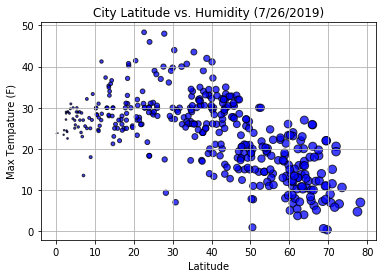

In [11]:
plt.scatter(x_axis, y_axis_temp, marker="o", facecolors="blue", edgecolors="black",
           s=x_axis, alpha=0.75)
plt.title("City Latitude vs. Humidity (7/26/2019)")
plt.grid()
plt.ylabel("Max Tempature (F)")
plt.xlabel("Latitude")

plt.show

#### Latitude vs. Cloudiness Plot

In [12]:
x_axis=weather_dataframe["Lat"]
y_axis_temp=weather_dataframe["Max Temp"]
y_axis_humidity=weather_dataframe["Humidity"]
y_axis_cloudiness=weather_dataframe["Cloudiness"]
y_axis_windspeed=weather_dataframe["Wind Speed"]
cloudiness_tempature = weather_dataframe.iloc[cloudiness_list]

cloudiness_tempature.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
100,Havelock,1,US,1563634350,59,34.88,-76.90,32.78,3.60
66,Dakar,40,SN,1563634386,69,14.69,-17.45,30.00,4.10
76,Shetpe,0,KZ,1563634388,27,44.14,52.16,32.64,7.17
90,Takoradi,100,GH,1563634391,74,4.89,-1.75,26.94,4.94
100,Havelock,1,US,1563634350,59,34.88,-76.90,32.78,3.60


<function matplotlib.pyplot.show(*args, **kw)>

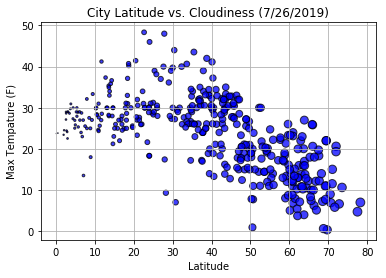

In [13]:
plt.scatter(x_axis, y_axis_temp, marker="o", facecolors="blue", edgecolors="black",
           s=x_axis, alpha=0.75)
plt.title("City Latitude vs. Cloudiness (7/26/2019)")
plt.grid()
plt.ylabel("Max Tempature (F)")
plt.xlabel("Latitude")

plt.show

#### Latitude vs. Wind Speed Plot

In [15]:
x_axis=weather_dataframe["Lat"]
y_axis_temp=weather_dataframe["Max Temp"]
y_axis_humidity=weather_dataframe["Humidity"]
y_axis_cloudiness=weather_dataframe["Cloudiness"]
y_axis_windspeed=weather_dataframe["Wind Speed"]
wind_tempature = weather_dataframe.iloc[windspeed_list]

wind_tempature.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
1,Bredasdorp,66,ZA,1563634373,47,-34.53,20.04,14.0,3.6
3,Kapaa,90,US,1563634373,88,22.08,-159.32,26.0,7.2
9,Iqaluit,90,CA,1563634374,100,63.75,-68.52,4.0,6.2
7,Punta Arenas,75,CL,1563634374,86,-53.16,-70.91,0.0,4.1
1,Bredasdorp,66,ZA,1563634373,47,-34.53,20.04,14.0,3.6


<function matplotlib.pyplot.show(*args, **kw)>

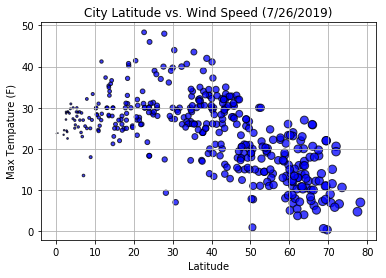

In [16]:
plt.scatter(x_axis, y_axis_temp, marker="o", facecolors="blue", edgecolors="black",
           s=x_axis, alpha=0.75)
plt.title("City Latitude vs. Wind Speed (7/26/2019)")
plt.grid()
plt.ylabel("Max Tempature (F)")
plt.xlabel("Latitude")

plt.show